In [1]:
# loading packages

import os

import pandas as pd
import numpy as np

# plotting packages
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as clrs

# Kmeans algorithm from scikit-learn
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


In [2]:
# load raw data
DATA_FOLDER = './'
raw = pd.read_csv(os.path.join(DATA_FOLDER, 'Country_risk_2019_data_clean.csv'))

# check the raw data
print("Size of the dataset (row, col): ", raw.shape)
print("\nFirst 5 rows\n", raw.head(n=5))
print("\nFirst 5 rows and 5 columns\n",raw .iloc[:5 , :5])

Size of the dataset (row, col):  (117, 6)

First 5 rows
      Country Abbrev  Corruption  Peace  Legal  GDP Growth
0    Albania     AL          35  1.821  4.546       2.983
1    Algeria     DZ          35  2.219  4.435       2.553
2    Armenia     AM          42  2.294  4.812       6.000
3  Australia     AU          77  1.419  8.363       1.713
4    Austria     AT          77  1.291  8.089       1.605

First 5 rows and 5 columns
      Country Abbrev  Corruption  Peace  Legal
0    Albania     AL          35  1.821  4.546
1    Algeria     DZ          35  2.219  4.435
2    Armenia     AM          42  2.294  4.812
3  Australia     AU          77  1.419  8.363
4    Austria     AT          77  1.291  8.089


In [3]:
# check for missing values
check = raw.isna().sum()
check

Country       0
Abbrev        0
Corruption    0
Peace         0
Legal         0
GDP Growth    0
dtype: int64

In [4]:
# print summary statistics
print("\nSummary statistics\n", raw.describe())
print("\nCorrelation matrix\n", raw.corr())


Summary statistics
        Corruption       Peace       Legal  GDP Growth
count  117.000000  117.000000  117.000000  117.000000
mean    47.452991    1.983923    5.799487    2.937897
std     18.636956    0.450063    1.367888    1.980018
min     16.000000    1.072000    2.895000   -0.483000
25%     34.000000    1.696000    4.803000    1.545000
50%     42.000000    1.933000    5.564000    2.700000
75%     60.000000    2.271000    6.621000    4.026000
max     87.000000    3.218000    8.712000    7.800000

Correlation matrix
             Corruption     Peace     Legal  GDP Growth
Corruption    1.000000 -0.695313  0.937936   -0.311196
Peace        -0.695313  1.000000 -0.644041    0.116462
Legal         0.937936 -0.644041  1.000000   -0.339697
GDP Growth   -0.311196  0.116462 -0.339697    1.000000


C:\Users\gmimo\AppData\Local\Temp\ipykernel_2788\3736554490.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  print("\nCorrelation matrix\n", raw.corr())


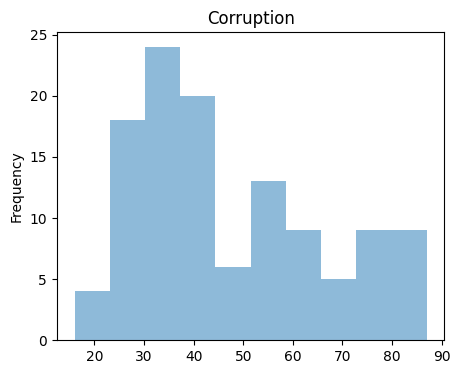

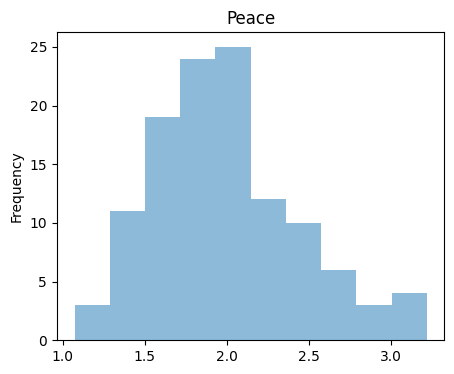

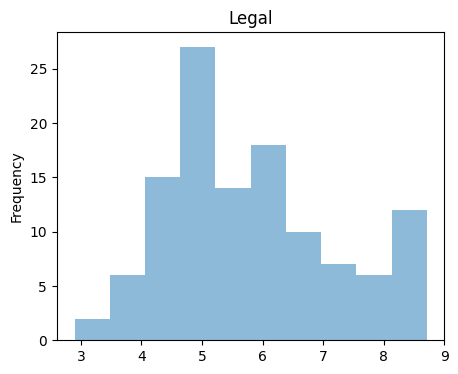

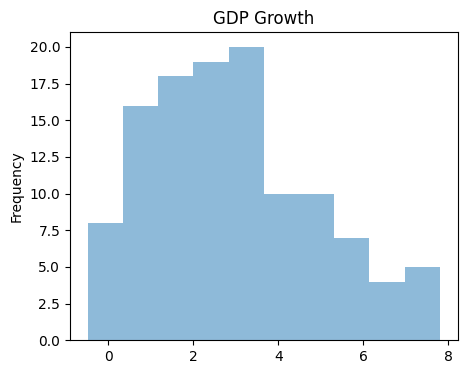

In [5]:
# plot histograms
plt.figure(1, figsize=(5,4))
raw['Corruption'].plot(kind = 'hist', title = 'Corruption', alpha = 0.5)

plt.figure(2, figsize=(5,4))
raw['Peace'].plot(kind = 'hist', title = 'Peace', alpha = 0.5)

plt.figure(3, figsize=(5,4))
raw['Legal'].plot(kind = 'hist', title = 'Legal', alpha = 0.5)

plt.figure(4, figsize=(5,4))
raw['GDP Growth'].plot(kind = 'hist', title = 'GDP Growth', alpha = 0.5)

plt.show()

In [6]:
#K means cluster
#Pick features & normalization
#Since Corruption and Legal are highly correlated, we drop the Courruption variable, i.e., we pick three features for this analysis, Peace, Legal and GDP Grwoth. Let's normalize all the features, effectively making them equally weighted.
X = raw[['Peace', 'Legal', 'GDP Growth']]
X = (X - X.mean()) / X.std()
print(X.head(5))

      Peace     Legal  GDP Growth
0 -0.362001 -0.916367    0.022779
1  0.522320 -0.997514   -0.194391
2  0.688963 -0.721906    1.546503
3 -1.255209  1.874066   -0.618630
4 -1.539613  1.673757   -0.673174


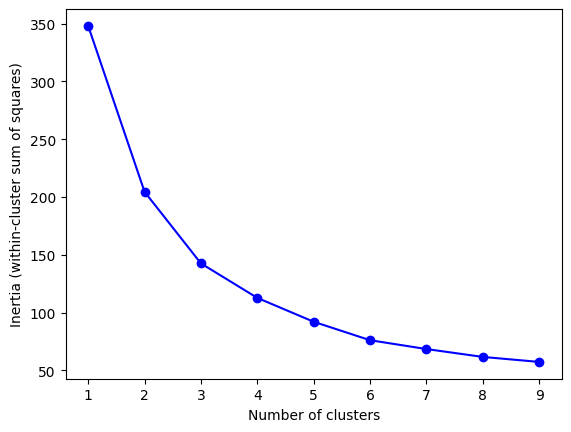

In [7]:
#Perform elbow method
# https://stackoverflow.com/questions/41540751/sklearn-kmeans-equivalent-of-elbow-method
Ks = range(1, 10)
inertia = [KMeans(i, n_init=10).fit(X).inertia_ for i in Ks]

fig = plt.figure()
plt.plot(Ks, inertia, '-bo')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia (within-cluster sum of squares)')
plt.show()


In [8]:
#K means with k=3
k = 3
kmeans = KMeans(n_clusters=k, n_init=10, random_state=1)
kmeans.fit(X)

# print inertia & cluster center
print("inertia for k=3 is", kmeans.inertia_)
print("cluster centers: ", kmeans.cluster_centers_)

# take a quick look at the result
y = kmeans.labels_
print("cluster labels: ", y)

inertia for k=3 is 142.38889168248923
cluster centers:  [[-0.85323191  0.95398018 -0.41202273]
 [ 0.79185888 -0.66396157 -0.46977323]
 [ 0.24442239 -0.60538153  1.39626942]]
cluster labels:  [1 1 2 0 0 1 1 2 0 2 2 1 0 1 0 1 1 0 1 0 2 1 0 0 0 0 1 0 2 1 2 1 0 2 0 0 1
 2 0 2 1 1 1 0 0 2 2 0 1 0 1 0 0 2 2 0 0 0 1 1 0 2 2 0 2 2 0 1 1 1 1 1 2 0
 0 1 0 0 1 2 1 1 2 0 0 0 0 1 2 1 2 2 2 0 0 0 1 0 1 0 0 0 2 1 1 1 1 1 2 1 0
 0 0 0 1 2 1]


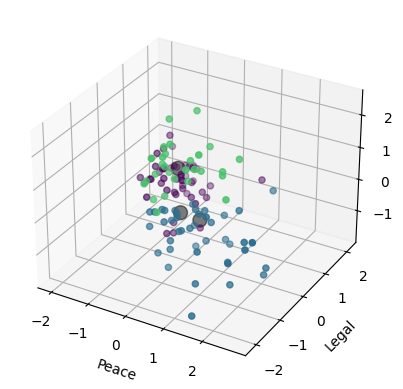

In [9]:
#Visualize the result (3D plot)
# set up the color
norm = clrs.Normalize(vmin=0.,vmax=y.max() + 0.8)
cmap = cm.viridis

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X.iloc[:,0], X.iloc[:,1], X.iloc[:,2], c=cmap(norm(y)), marker='o')

centers = kmeans.cluster_centers_
ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

ax.set_xlabel('Peace')
ax.set_ylabel('Legal')
ax.set_zlabel('GDP Growth')

plt.show()


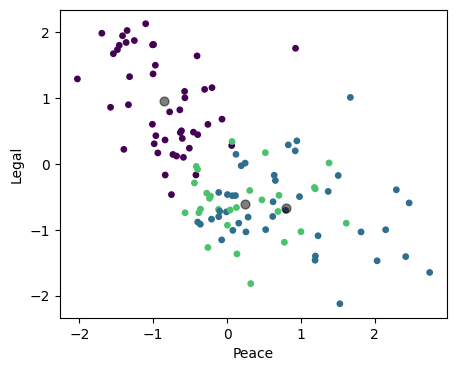

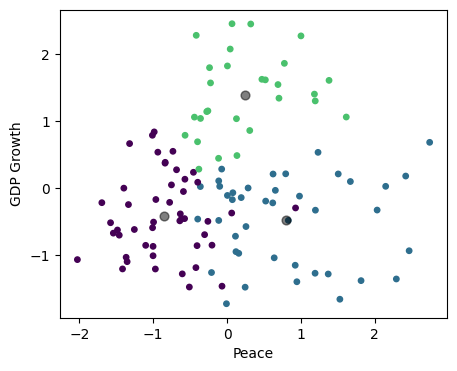

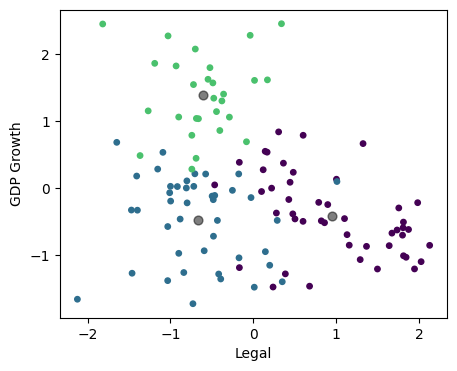

In [10]:
#Visualize the result (3 2D plots)
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']

for i in range(3):
    fig = plt.figure(i, figsize=(5,4))
    plt.scatter(X.iloc[:,figs[i][0]], X.iloc[:,figs[i][1]], c=cmap(norm(y)), s=15)
    plt.scatter(centers[:, figs[i][0]], centers[:, figs[i][1]], c='black', s=40, alpha=0.5)
    plt.xlabel(labels[figs[i][0]])
    plt.ylabel(labels[figs[i][1]])

plt.show()

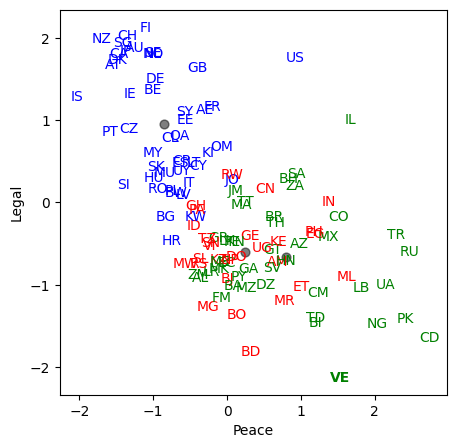

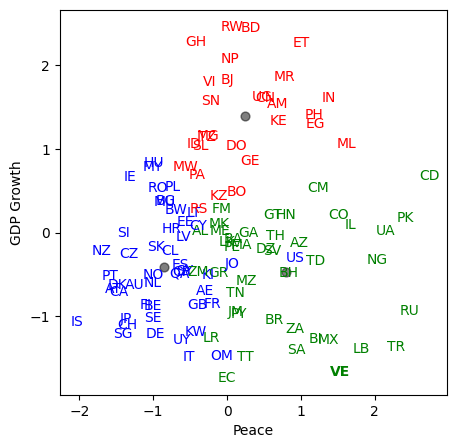

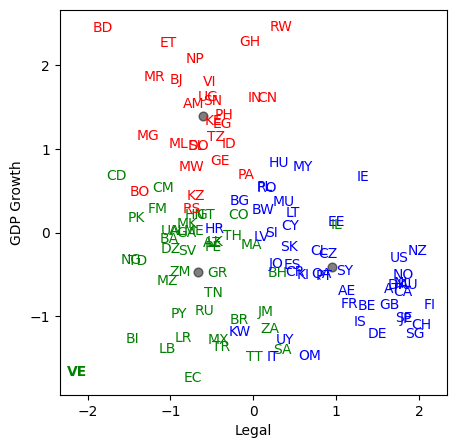

In [11]:
#Visualize the result (3 2D plots)
#plot country abbreviations instead of dots.
%matplotlib inline
import matplotlib.pyplot as plt

figs = [(0, 1), (0, 2), (1, 2)]
labels = ['Peace', 'Legal', 'GDP Growth']
colors = ['blue','green', 'red']

for i in range(3):
    fig = plt.figure(i, figsize=(5, 5))
    x_1 = figs[i][0]
    x_2 = figs[i][1]
    plt.scatter(X.iloc[:, x_1], X.iloc[:, x_2], c=y, s=0, alpha=0)
    plt.scatter(centers[:, x_1], centers[:, x_2], c='black', s=40, alpha=0.5)
    for j in range(X.shape[0]):
        if raw.loc[j, 'Abbrev'] == 'VE':
            plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                 color=colors[y[j]], weight='bold', horizontalalignment = 'center', verticalalignment = 'center')
        else:
            plt.text(X.iloc[j, x_1], X.iloc[j, x_2], raw['Abbrev'].iloc[j], 
                    color=colors[y[j]], horizontalalignment = 'center', verticalalignment = 'center')
    plt.xlabel(labels[x_1])
    plt.ylabel(labels[x_2])

plt.show()

In [12]:
print(X.columns)
print(centers)

Index(['Peace', 'Legal', 'GDP Growth'], dtype='object')
[[-0.85323191  0.95398018 -0.41202273]
 [ 0.79185888 -0.66396157 -0.46977323]
 [ 0.24442239 -0.60538153  1.39626942]]


Label | Peace | Legal | GDP | => Risk
---|---|---|---|---
0|+++|+++|++|Moderate
1|+|+|+|High
2|++|++|+++|Low

In [13]:
#List the result
result = pd.DataFrame({'Country':raw['Country'], 'Abbrev':raw['Abbrev'], 'Label':y})
result.loc[:, 'Risk'] = result['Label'].replace({0: 'Moderate', 1: 'High', 2: 'Low'})
with pd.option_context('display.max_rows', None, 'display.max_columns', 3):
    print(result.sort_values('Label'))


                          Country  ...      Risk
93                      Singapore  ...  Moderate
94                       Slovakia  ...  Moderate
32                        Estonia  ...  Moderate
34                        Finland  ...  Moderate
35                         France  ...  Moderate
38                        Germany  ...  Moderate
86                        Romania  ...  Moderate
85                          Qatar  ...  Moderate
84                       Portugal  ...  Moderate
83                         Poland  ...  Moderate
43                        Hungary  ...  Moderate
44                        Iceland  ...  Moderate
95                       Slovenia  ...  Moderate
47                        Ireland  ...  Moderate
77                           Oman  ...  Moderate
51                          Japan  ...  Moderate
52                         Jordan  ...  Moderate
76                         Norway  ...  Moderate
55                  Korea (South)  ...  Moderate
56                  

In [14]:
result.to_csv('results_kmeans_elbow_clean.csv') 